# Project: AllLife Credit Card Customer Segmentation
## GUMED

## Background:
    
AllLife Bank wants to focus on its credit card customer base in the next 
financial year. They have been advised by their marketing research team, that the 
penetration in the market can be improved. Based on this input, the Marketing team 
proposes to run personalised campaigns to target new customers as well as upsell to 
existing customers. Another insight from the market research was that the customers 
perceive the support services of the back poorly. Based on this, the Operations team 
wants to upgrade the service delivery model, to ensure that customers queries are 
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the 
Data Science team for help.

## Objective:
    
To identify different segments in the existing customer based on their 
spending patterns as well as past interaction with the bank.

Source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Key Questions:
    
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Data Description:
    
 Data is of various customers of a bank with their credit limit, the total number of credit 
cards the customer has, and different channels through which customer has 
contacted the bank for any queries, different channels include visiting the bank, 
online and through a call centre.

## Steps to follow:
1. Define the problem and perform an Exploratory Data Analysis
"- Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis " 
2. Illustrate the insights based on EDA
Key meaningful observations on individual variables and the relationship between variables 
3. Data pre-processing
"Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment - Duplicate observations check and removal if found" 
4. Applying K-means clustering algorithms
"Apply K-means - Elbow curve - Silhouette Score - figure out appropriate number of cluster" 
5. Applying Hierarchical clustering
"- Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage methods - Choose appropriate number of cluster" 
6. "Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights"
"- Compare clusters obtained from k-means and hierarchical clustering techniques - Perform cluster profiling - Insights about different clusters" 
7. Actionable Insights & Recommendations
"- Conclude with the key takeaways for the business - What would your buisness recommendation." 
8. Notebook - Overall
"- Structure and flow - Well commented code" 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Credit.csv')

In [5]:
df.shape

(660, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### No nulls accounted for in the list

In [7]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [8]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


#### Check for duplicates in the Customer Key column

In [10]:
duplicate = df['Customer Key'].duplicated().any()
duplicate

True

#### Remove duplicates

In [11]:
df.sort_values("Customer Key", inplace=True)
df.drop_duplicates(subset = "Customer Key", keep = False, inplace=True)
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,451,11265,51000,7,3,2,0
378,379,11398,12000,6,5,2,1
179,180,11412,19000,2,2,3,4
321,322,11466,9000,7,5,0,0
609,610,11562,38000,4,3,2,0
...,...,...,...,...,...,...,...
520,521,99437,39000,6,4,0,4
592,593,99473,54000,5,4,2,1
80,81,99589,20000,2,2,4,8
205,206,99596,17000,1,0,5,5


In [12]:
df.shape

(650, 7)

In [13]:
df_attr=df.iloc[:,2:]
df_attr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,51000,7,3,2,0
378,12000,6,5,2,1
179,19000,2,2,3,4
321,9000,7,5,0,0
609,38000,4,3,2,0
316,18000,6,4,0,2
128,8000,4,1,5,4
292,17000,4,3,0,4
561,29000,7,5,0,2
349,11000,7,3,2,3


In [14]:
df_attr.shape

(650, 5)

### Univariate and Bivariate Analysis

In [15]:
def histo_boxplot(feature, figsize=(15,10), bins = None):
    f, (ax_box, ax_hist) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box, showmeans=True, color='blue') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist) 
    ax_hist.axvline(np.mean(feature), color='yellow', linestyle='--')
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') 

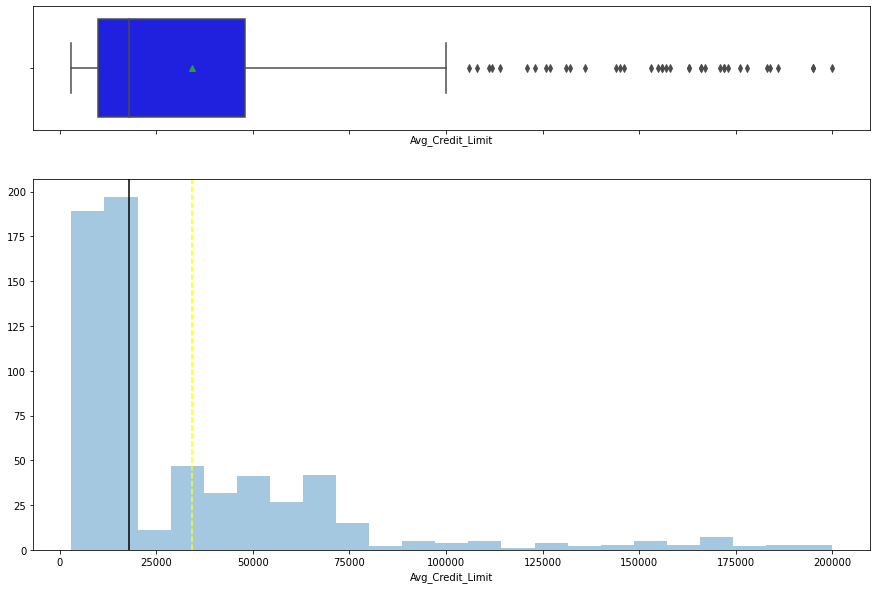

In [16]:
histo_boxplot(df_attr["Avg_Credit_Limit"])

The largest group of customers have an Average Credit Limit that is lower than $20000. The customers that are perceived initially as outliers have high credit limits. They must also be taken into consideration due to them having the potential of spending higher amounts. 

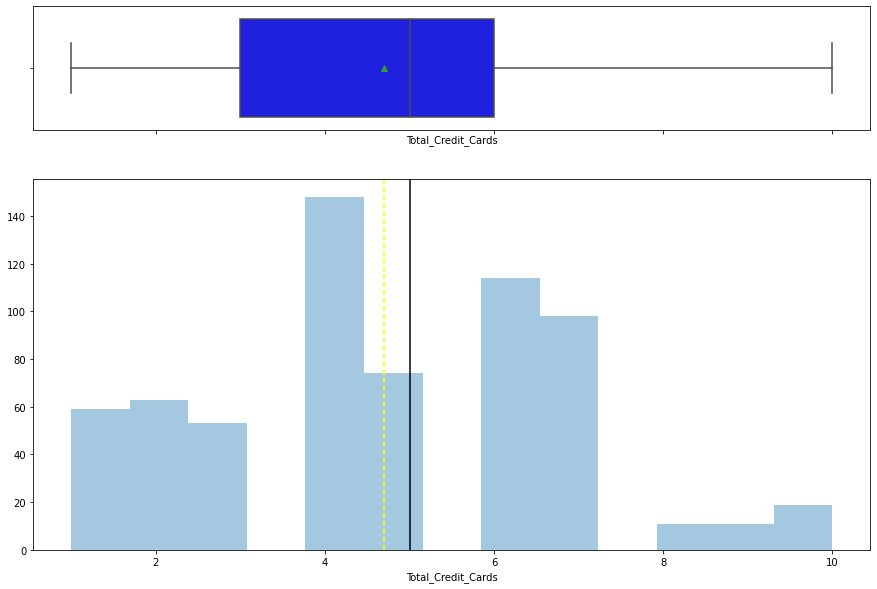

In [17]:
histo_boxplot(df_attr["Total_Credit_Cards"])

Among all customers the amount of cards a higher group of them have between 4 to 6 credit cards.

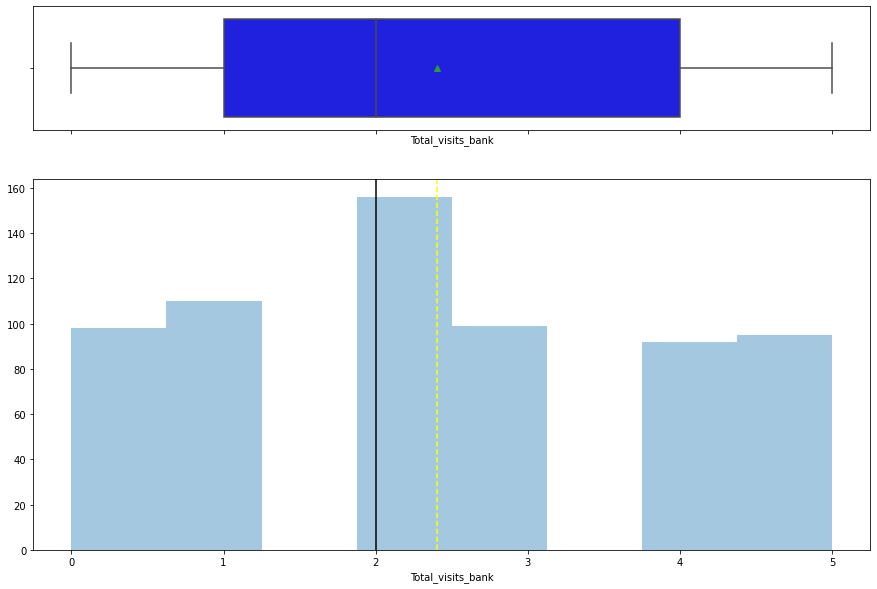

In [18]:
histo_boxplot(df_attr["Total_visits_bank"])

Customer visits to the bank range from 0 to 5 visits, without much difference among them, and with the highest amout of visits being two.

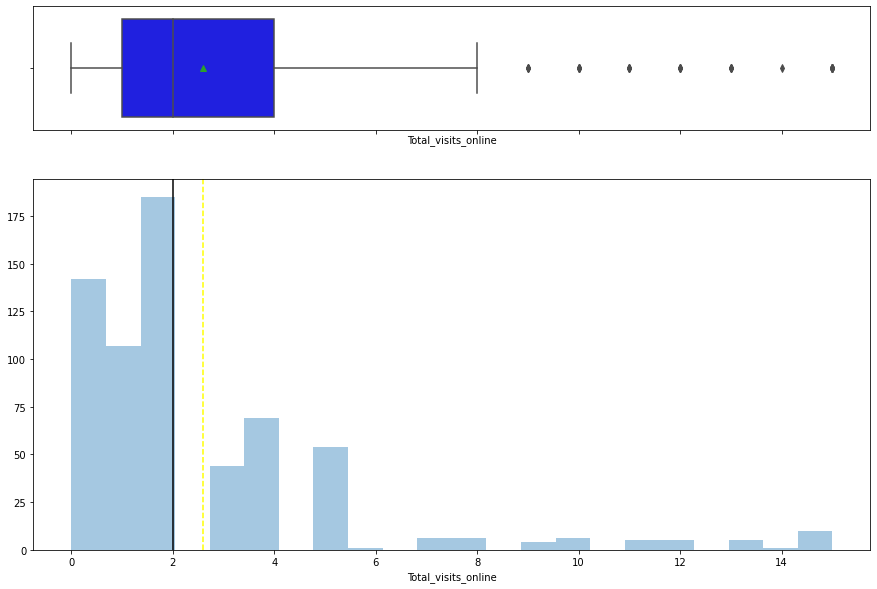

In [19]:
histo_boxplot(df_attr["Total_visits_online"])

Online visits seem to be effective in regards to how many times they return. The highest amount of visits are at two, and they narrow down after two. Customers do return more times when dealing with the bank. This can be because they can perform the transactions like bank statements, payments and others themselves.

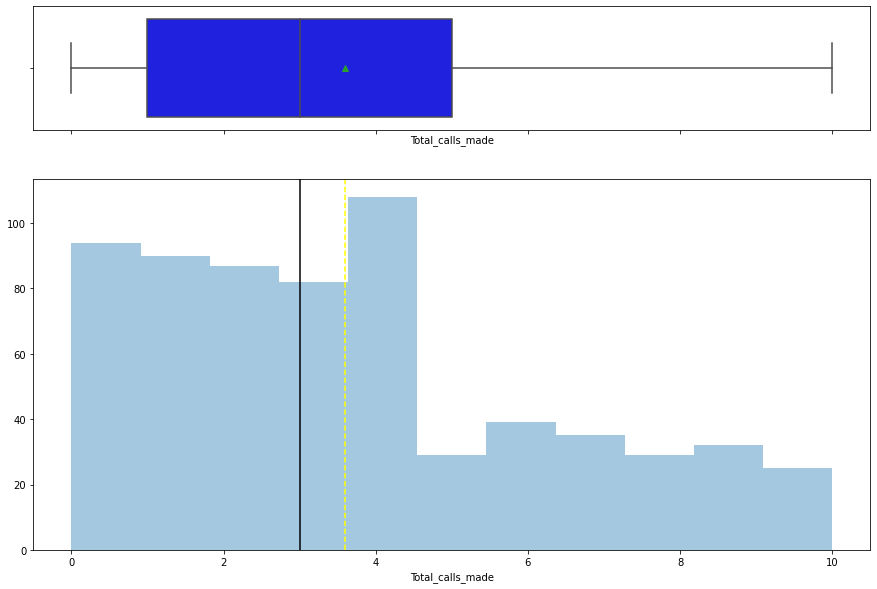

In [20]:
histo_boxplot(df_attr["Total_calls_made"])

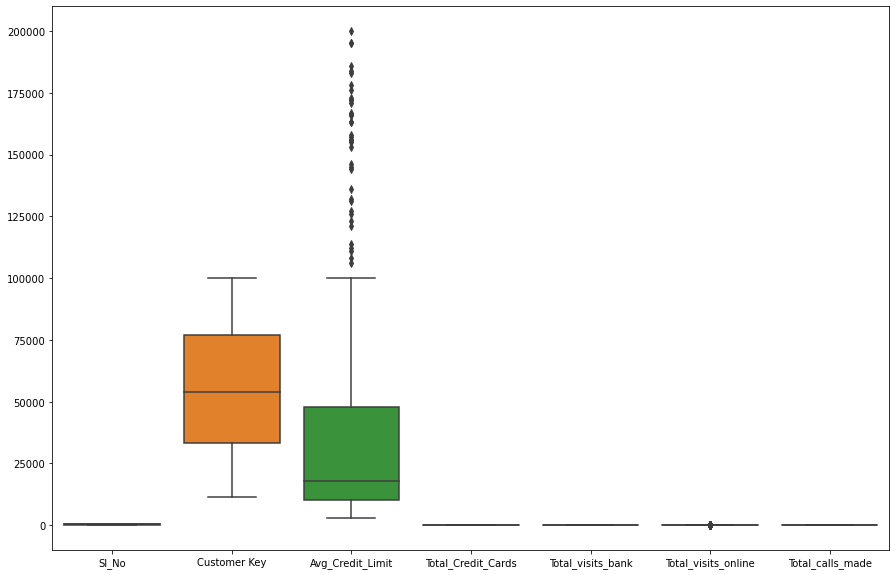

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

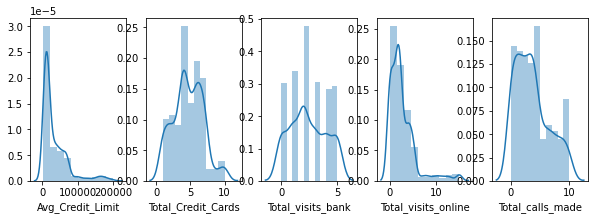

In [78]:
#Seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 5, figsize=(10,3))
plot1 = sns.distplot(df_attr["Avg_Credit_Limit"],bins=10, ax= ax[0])
plot2 = sns.distplot(df_attr["Total_Credit_Cards"],bins=10, ax=ax[1])
plot3 = sns.distplot(df_attr["Total_visits_bank"],bins=10, ax= ax[2])
plot4 = sns.distplot(df_attr["Total_visits_online"],bins=10, ax=ax[3])
plot5 = sns.distplot(df_attr["Total_calls_made"], bins=10, ax=ax[4])
f.savefig('subplot.png')


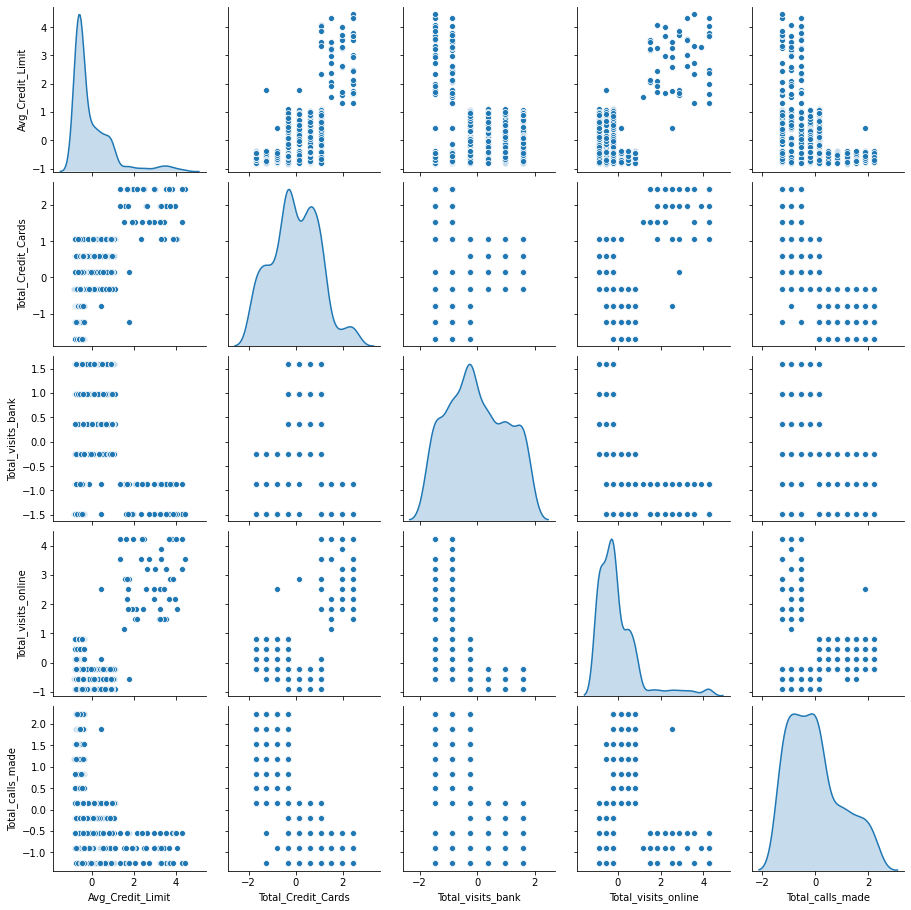

In [79]:
from scipy.stats import zscore
dfScaled=df_attr.apply(zscore)
sns.pairplot(dfScaled,diag_kind='kde')

In [80]:
df_z = df_attr.apply(zscore)
df_z.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,0.450436,1.060199,0.367125,-0.205827,-1.258480
378,-0.597042,0.599859,1.597182,-0.205827,-0.908304
179,-0.409033,-1.241502,-0.247904,0.136341,0.142226
321,-0.677617,1.060199,1.597182,-0.890164,-1.258480
609,0.101277,-0.320822,0.367125,-0.205827,-1.258480
316,-0.435892,0.599859,0.982153,-0.890164,-0.558127
128,-0.704476,-0.320822,-0.862932,0.820678,0.142226
292,-0.462750,-0.320822,0.367125,-0.890164,0.142226
561,-0.140449,1.060199,1.597182,-0.890164,-0.558127
349,-0.623901,1.060199,0.367125,-0.205827,-0.207951


The customers are identified in different segments in the existing customer based. THe first cluster is their 
spending patterns which is obtained from the Average Credit limit and Total Credit cards. The second cluster is for the past interactions with the bank, which is determined from the Total visits to the bank, the total visits online and the total calls made.

## K Means

### Similar clusters are grouped together

With K-Means clustering the data is grouped based on attributes. 
To determine the optimal number of groups, we ar eusing the elbow method.

Text(0.5, 1.0, 'Elbow Method: Select k')

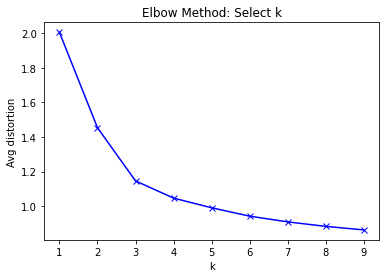

In [81]:
#Optimal number of groups
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Avg distortion')
plt.title('Elbow Method: Select k')

The bend is more noticible in k=3, so let's look at 2 and 3 clusters

In [82]:
# Let's first start with the smaller amount of clusters, with k = 2
final_model=KMeans(2)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Appending the prediction 
df_attr["Cluster_Group"] = prediction
dfScaled["Cluster_Group"] = prediction
#print("Amount of Cluster Groups that are Assigned : \n")
df_attr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
450,51000,7,3,2,0,1
378,12000,6,5,2,1,1
179,19000,2,2,3,4,0
321,9000,7,5,0,0,1
609,38000,4,3,2,0,1
316,18000,6,4,0,2,1
128,8000,4,1,5,4,0
292,17000,4,3,0,4,1
561,29000,7,5,0,2,1
349,11000,7,3,2,3,1


#### The distribution of the data among the groups when K = 2. An informative and popular tool for visualization is the boxplot. We will use the boxplot for this visualization.

In [83]:
dfClust = df_attr.groupby(['Cluster_Group'])
dfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_Group,,,,,
0,12180.18018,2.405405,0.936937,3.567568,6.851351
1,45665.88785,5.885514,3.163551,2.100467,1.904206


#### In the two clusters created, the first group with the highest average credit limit a higher amount of credit cards and they also visit the bank more often.

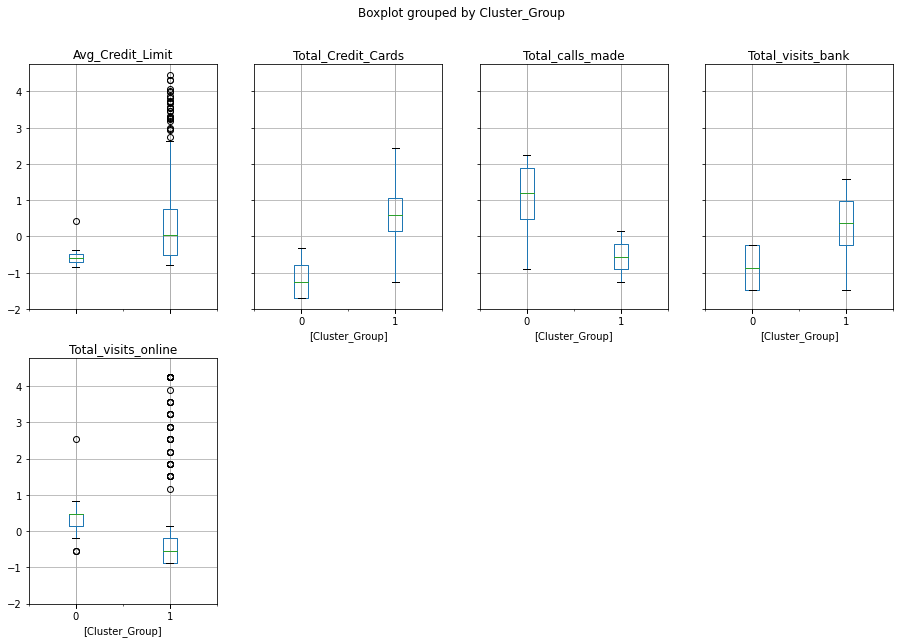

In [84]:
dfScaled.boxplot(by='Cluster_Group', layout = (2,4),figsize=(15,10));

### Let's try with k=3

In [85]:
# Let's try with k = 3
final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Appending the prediction 
df_attr["Cluster_Group"] = prediction
dfScaled["Cluster_Group"] = prediction
df_attr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
450,51000,7,3,2,0,1
378,12000,6,5,2,1,1
179,19000,2,2,3,4,0
321,9000,7,5,0,0,1
609,38000,4,3,2,0,1
316,18000,6,4,0,2,1
128,8000,4,1,5,4,0
292,17000,4,3,0,4,1
561,29000,7,5,0,2,1
349,11000,7,3,2,3,1


In [86]:
dfClust = df_attr.groupby(['Cluster_Group'])
dfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_Group,,,,,
0,12180.180180,2.405405,0.936937,3.567568,6.851351
1,33631.578947,5.513158,3.486842,0.981579,2.010526
2,140937.500000,8.833333,0.604167,10.958333,1.062500


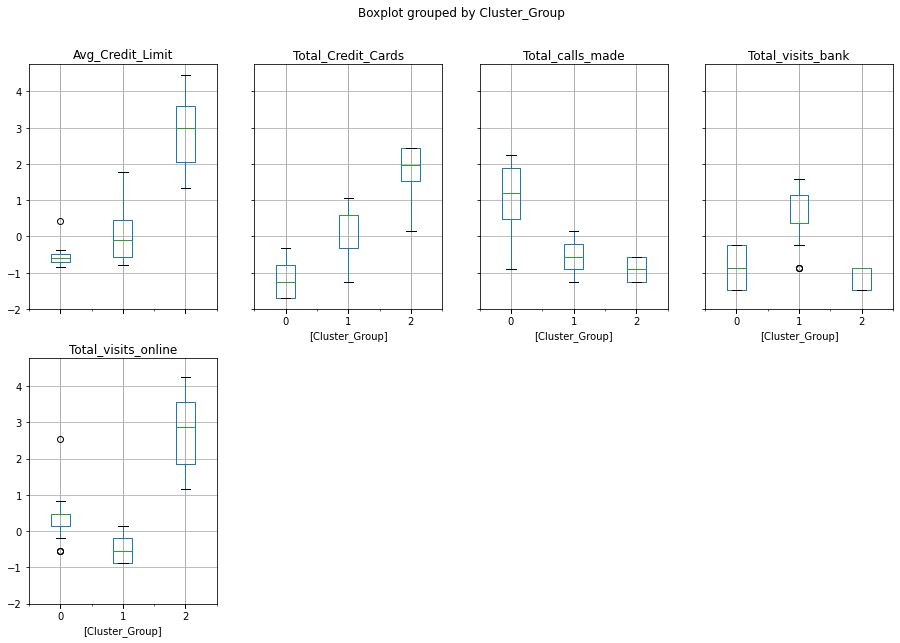

In [87]:
dfScaled.boxplot(by='Cluster_Group', layout = (2,4),figsize=(15,10));

Grouping with k=3 demonstrated that there is some noticiable differences between the 3 clusters that where created, including the number of customers that were located as outliers when using k=2. These 3 groups can be studied further to focus efforts on the customers with the highest conversion probability and finally obtaining better results in out campaign.

In [88]:
from sklearn.preprocessing import StandardScaler
import numpy as np
std_c1 = StandardScaler()
X_s1 = pd.DataFrame(std_c1.fit_transform(df_attr),columns=df_attr.columns)

### Hierarchical Clustering

In [90]:
from sklearn.cluster import AgglomerativeClustering 

In [91]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [92]:
model.fit(dfScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [93]:
df_attr['labels'] = model.labels_
df_attr.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group,labels
450,51000,7,3,2,0,1,0
378,12000,6,5,2,1,1,0
179,19000,2,2,3,4,0,2
321,9000,7,5,0,0,1,0
609,38000,4,3,2,0,1,0
316,18000,6,4,0,2,1,0
128,8000,4,1,5,4,0,2
292,17000,4,3,0,4,1,0
561,29000,7,5,0,2,1,0
349,11000,7,3,2,3,1,0


In [94]:
Cust_Clust = df_attr.groupby(['labels'])

In [95]:
Cust_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
labels,,,,,,
0,33631.578947,5.513158,3.486842,0.981579,2.010526,1
1,140937.500000,8.833333,0.604167,10.958333,1.062500,2
2,12180.180180,2.405405,0.936937,3.567568,6.851351,0


In [96]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [97]:
# To measure the correlation between the distance of points we are using the cophenet index

Z = linkage(dfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.9101811889497697

The cophenet index is at 0.91, close to 1. Our result is a good number indicating that there is good clustering.

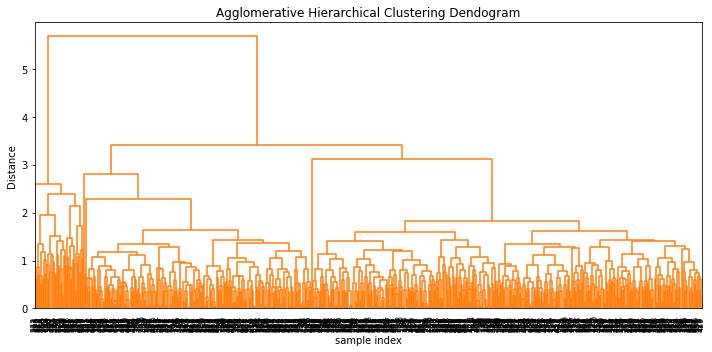

In [98]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

Recreate the dendrogram for last 12 merged clusters
### From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

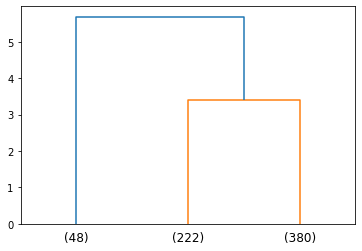

In [99]:
dendrogram(
    Z, truncate_mode='lastp',
    p=3,  
)
plt.show()

### Find out the linkage matrix

In [100]:
from sklearn.preprocessing import StandardScaler
import numpy as np
std_c = StandardScaler()
X_s = pd.DataFrame(std_c.fit_transform(df_attr),columns=df_attr.columns)

In [101]:
# Linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z2 = linkage(X_s, 'ward', metric='euclidean')
Z2.shape

(649, 4)

In [102]:
Z2[:]

array([[1.00000000e+00, 1.59000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.21000000e+02, 5.74000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+01, 2.22000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.29300000e+03, 1.29400000e+03, 1.65531772e+01, 3.80000000e+02],
       [1.29200000e+03, 1.29600000e+03, 5.02388159e+01, 4.28000000e+02],
       [1.29500000e+03, 1.29700000e+03, 6.88468429e+01, 6.50000000e+02]])

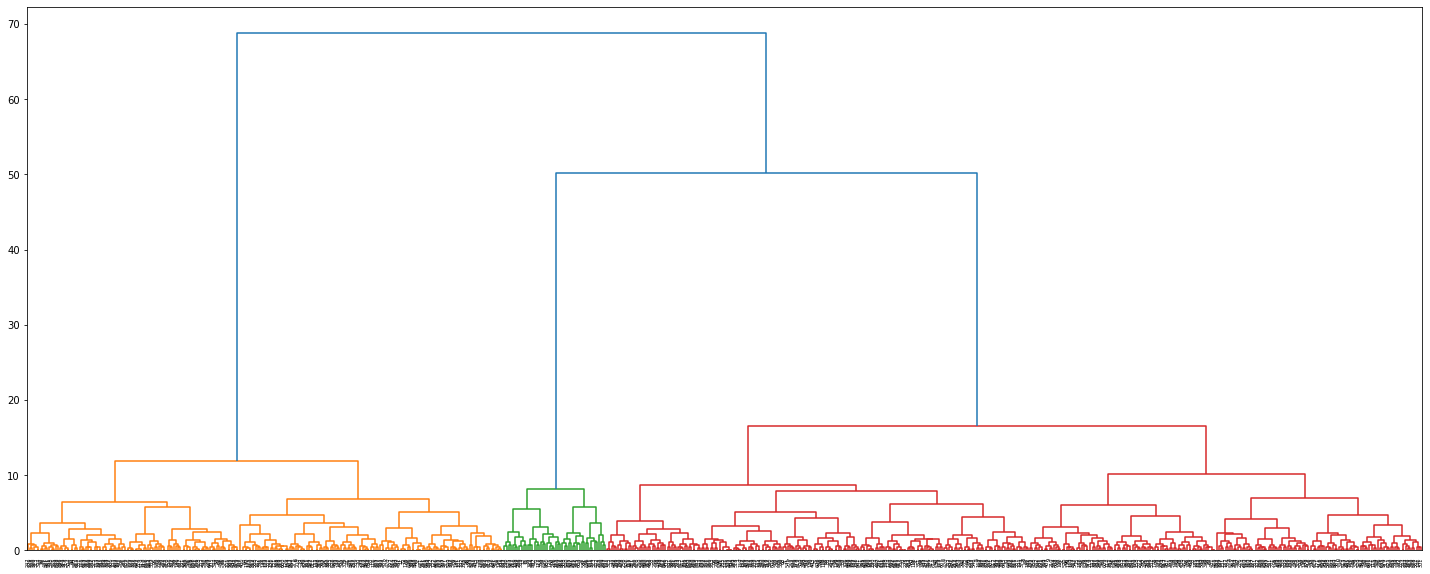

In [103]:
plt.figure(figsize=(25, 10))
dendrogram(Z2)
plt.show()

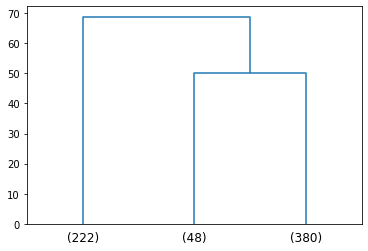

In [104]:
dendrogram(
    Z2,
    truncate_mode='lastp',
    p=3,
)
plt.show()

In [105]:
max_distance=52

### Cluster the data into 3 different groups

In [106]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z2, max_distance, criterion='distance')
clusters

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,

In [107]:
# Average Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(X_s,clusters)

0.5479503888742203

Silhoutte score here is closer to 1 at 0.55, meaning that the clusters are well apart from each other and distinguished

### Dendogram with 'Ward' linkage

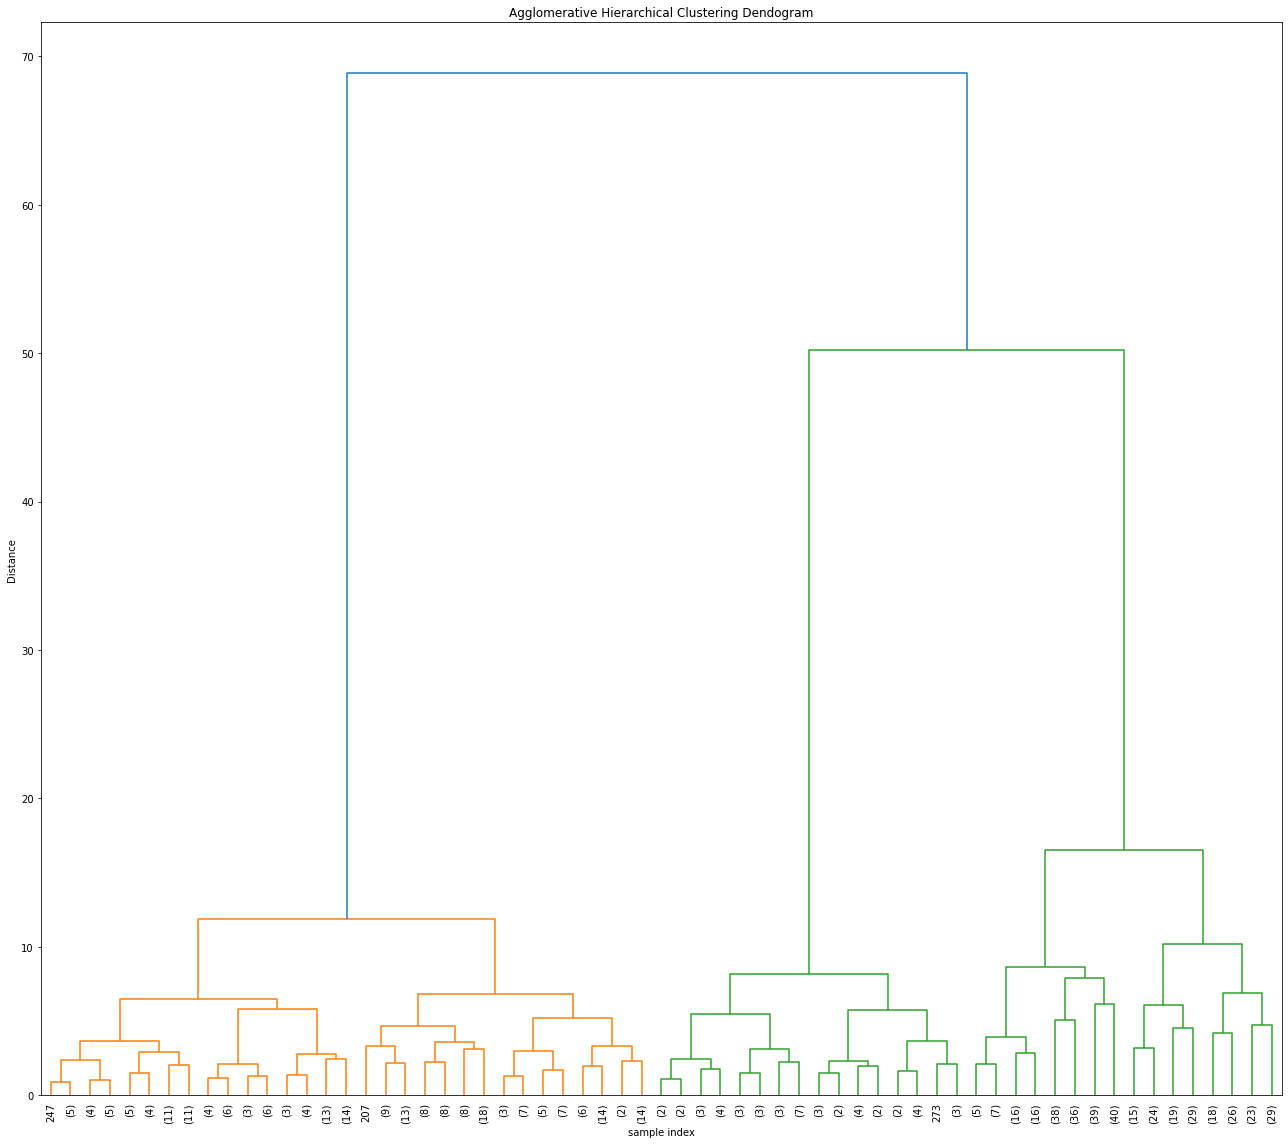

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z2 = linkage(X_s, 'ward')
dendrogram(Z2,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### Conclusion
#### There are three main segments that differentiate themeselves among each other mainly by how much spending power they have due to the available credit that they have and accessibility the amount of interactions and transactions that they have with the banking system. 
#### The customers with higher spending power usually use online banking more, this is potentially due to the reason that they might have higher levels of education, and might be more skillfull with technology. More online campaigns and offers could be targetted towards this group. 
#### Customers with an intermediate medium income, who could fall in the middle class group visit the bank more often. Contacting this customers by mail about offers in their state or country, and include advertising in the mail about the benefits of online banking, in terms of saving time and money can stear them to using the online platforms more. A higher customer turnout in online visits could present opportunities for the bank to advertise more products at a lower cost which can represent a decrese in yearly expenses.
#### Customer with lower credit limits, are usually due to either low income or bad credit. These customer have a higher amount of calls to the bank, which could be due to them needing help with solving financial difficulties. These customers can be contacted with ideas on how to improve their credit and products that steer them to healthier financial practices.